# 웹 파이썬 텀프로젝트 (게임시장 조사하기)

이름 : 오규혁 

주제 : 한국과 전 세계를 대상으로 한 게임 순위를 조사하여 게임시장의 현 상황을 알아본다.

주제 선정 이유 : 전 세계 와 한국의 게임시장을 조사하여 한국 게임의 현 상황을 알아보고 사람들이 선호하는 게임들의 장르와 특징을 알아보고, 한국 게임시장의 성장을 위해서 할 수 있는 일을 알아본다.<br>


가설 정의 : 최근 게임 시장에서 aos장르의 게임과 협동 fps게임이 주를 이루고 있으며, 이 상황은 오랜 시간 변함없이 유지되고 있는 것 같다는 생각이 들었다. 이를 확인하고, 한국 게임 시장의 앞으로의 방향성을 제시한다. 그리고 한국 게임순위와 전 세계의 게임 순위의 비교를 통하여 한국의 게임이 세계적 인기를 끌려면 어떤 장르의 게임을 만들어야 인기를 끌 수 있는지 알아본다.<br>
스팀에서는 패키지 게임, 온라인 게임 등 다양한 분야의 게임의 순위를 조사할 것이다.<br>
게임트릭스에서는 한국 pc방 게임 이용순위를 조사하여, 한국에서 즐겨하는 게임의 분야를 조사할 것이다.<br>
게임메카에서는 한국 게임 유저들이 관심있어하는 게임의 분야를 조사할 것이다.<br>
(게임메카의 경우 직접 게임을 플레이하는 것 뿐만이 아닌 포털사이트 검색, 홈페이지 방문 등도 순위의 기준이다.)<br>
newzoo에서는 전세계 게임 이용순위와 스트리밍 시 시청 순위를 조사하여<br>
전 세계 게임시장의 유저들이 관심있어하는 분야를 조사할 것이다.<br>

데이터 획득:<br>
steam : 스팀은 게임 순위를 해당 게임의 동접자 수를 기준으로 한다.<br>
이 동접자 수를 나열하여 각 게임의 순위를 정리한다.<br>
데이터 수집은 가장 최근 자료를 기준으로 한다.<br>
steam game/stats 사이트에서 web crawling을 하여 정보를 얻어온다.<br>
또한 스팀에서는 따로 장르를 알려주지 않으므로,<br>
네이버에서 직접 정보를 끌어와 장르를 조사한다.

데이터 가공:<br>
steam: 웹 크롤링을 통하여 게임의 이름과 각 게임에 해당하는 동접자수를 포함한 모든 정보를 얻고,<br>
이 모든 정보에서 게임의 이름과 동접자 수 만을 추출하기 위해서,<br>
for 문과 if문, tag.text()를 이용하여 태그 사이의 정보만을 추출하였다.<br>
장르의 경우 각 게임의 해당하는 장르를 추출하기 위해,<br>
장르와 게임 이름을 dictionary로 표현하고, 그 안의 value값 만을 추출하여 장르를 저장했다.<br>
그리고 이 정보들을 list형식으로 표현하여 표와 그래프로 정보를 시각화한다.

In [2]:
#steam web crawling
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd
import json
game_name = []
stats = []
stats_today = []
stats_peak = []
stats_ranking = []
steam_genre = []
steam_graph = []
url='https://store.steampowered.com/stats/'
page = urlopen(url)
soup = BeautifulSoup(page,"html.parser")
soup.prettify()
dict_steam_genre = {'Dota 2':'AOS', "PLAYERUNKNOWN'S BATTLEGROUNDS":'FPS', 'Counter-Strike: Global Offensive':'FPS',
                    'Total War: THREE KINGDOMS':'RTS', "Tom Clancy's Rainbow Six Siege":'FPS', 'Grand Theft Auto V':'액션',
                    'Warframe':'FPS',  'Football Manager 2019':'스포츠', 'Team Fortress 2':'FPS','ARK: Survival Evolved':'어드벤쳐',
                    "Garry's Mod":'아케이드', 'Rust':'어드벤쳐', 'MONSTER HUNTER: WORLD':'RPG', 'Rocket League':'스포츠', 
                    'Source SDK Base 2013 Multiplayer':'FPS', 'Dead by Daylight':'액션','Terraria':'RPG', 'Ring of Elysium':'FPS',
                    "Sid Meier's Civilization VI":'RTS', "Sid Meier's Civilization V":'RTS', 'NBA 2K19':'스포츠',
                    'Stellaris':'RTS', 'Euro Truck Simulator 2':'아케이드', 'The Elder Scrolls Online':'RPG', 'Unturned':'FPS',
                    'Hearts of Iron IV':'RTS', 'World of Tanks Blitz':'액션', 'Wallpaper Engine':'기타', 'War Thunder':'액션',
                    'MORDHAU':'FPS', 'Arma 3':'FPS', 'Total War: WARHAMMER II':'RTS', 'Paladins':'RTS', 'Cities: Skylines':'아케이드',
                    'Left 4 Dead 2':'FPS', 'Counter-Strike':'FPS', 'Stardew Valley':'아케이드', "Don't Starve Together":'어드벤쳐',
                    "Assassin's Creed Odyssey":'액션', 'The Witcher 3: Wild Hunt':'액션', 'Europa Universalis IV':'RTS',
                    'The Elder Scrolls V: Skyrim Special Edition':'RPG', 'Borderlands 2':'FPS', 'RimWorld':'RTS', 'Fallout 4':'액션',
                    'Spacewar':'액션', 'PAYDAY 2':'액션', 'Football Manager 2018':'스포츠', 'FINAL FANTASY XIV Online':'RPG',
                    'The Elder Scrolls V: Skyrim':'RPG', 'Mount & Blade: Warband':'RPG', '7 Days to Die':'액션', 'Path of Exile':'RPG',
                    'Age of Empires II: HD Edition':'RTS', 'DARK SOULS™ III':'RPG', 'Conan Exiles':'어드벤쳐',
                    'Farming Simulator 19':'아케이드', 'DayZ':'FPS', 'Factorio':'RTS', 'Watch_Dogs 2':'FPS', 'Yu-Gi-Oh! Duel Links':'TCG',
                    'Grim Dawn':'어드벤쳐','World of Warships':'RTS', 'SMITE':'액션', 'Crusader Kings II':'RTS', 'Brawlhalla':'액션',
                    'Idle Champions of the Forgotten Realms':'액션','Slay the Spire':'TCG', 'Killing Floor 2':'FPS',
                    'Human: Fall Flat':'아케이드', 'The Binding of Isaac: Rebirth':'액션', 'Shadowverse':'TCG',
                    'Kerbal Space Program':'아케이드', 'Divinity: Original Sin 2':'RPG', 'Albion Online':'RPG',
                    'VRChat':'기타', 'Company of Heroes 2':'FPS', 'Total War: ROME II - Emperor Edition':'RTS', 'Sekiro™: Shadows Die Twice':'액션',
                    'DEAD OR ALIVE Xtreme Venus Vacation':'아케이드', 'The Forest':'어드벤쳐', 'Risk of Rain 2':'FPS',
                    'Deathgarden: BLOODHARVEST':'액션', 'Football Manager 2017':'스포츠', 'Counter-Strike: Source':'FPS',
                    'XCOM 2':'RTS', 'For Honor':'액션', "Conqueror's Blade":'RPG', 'Oxygen Not Included':'아케이드',
                    'Space Engineers':'아케이드', 'Black Desert Online':'RPG', 'TEKKEN 7':'액션', 'Crossout':'레이싱',
                    'The Sims(TM) 3':'아케이드', 'ATLAS':'RPG', 'Raft':'어드벤쳐', 'Trove':'RPG', 'Enter the Gungeon':'FPS', 'SCP: Secret Laboratory':'FPS',
                    'Heroes & Generals':'FPS'}
for j in range(1,101):
    stats_ranking.append(j)
tags2 = soup.find_all('span','currentServers')
for tag in tags2:
    stats.append(tag.text)
for i in range(0,200):
    if i % 2 == 1:
        stats_peak.append(stats[i])
    else:
        stats_today.append(stats[i])
tags = soup.find_all('a','gameLink')
for tag in tags:
    game_name.append(tag.text)
for value in dict_steam_genre.values():
    steam_genre.append(value)
steam_graph.append(steam_genre.count('FPS'))
steam_graph.append(steam_genre.count('AOS'))
steam_graph.append(steam_genre.count('RTS'))
steam_graph.append(steam_genre.count('RPG'))
steam_graph.append(steam_genre.count('TCG'))
steam_graph.append(steam_genre.count('액션'))
steam_graph.append(steam_genre.count('어드벤쳐'))
steam_graph.append(steam_genre.count('스포츠'))
steam_graph.append(steam_genre.count('레이싱'))
steam_graph.append(steam_genre.count('아케이드'))
steam_graph.append(steam_genre.count('기타'))

steam_dict = {'FPS':22,'AOS':1,'RTS':15,'RPG':15,'TCG':3,'액션':18,'어드벤쳐':7,'스포츠':5,'레이싱':1,'아케이드':11,'기타':2}
steam_genre_graph = list(steam_dict)
#기타의 경우는 게임이 아닌 컴퓨터 바탕화면을 애니메이션 방식으로 만들기 위한 월페이퍼 엔진이므로, 장르를 기타로 분류하였다.
#또 하나는 채팅을 위한 프로그램이므로 기타로 분류하였다.
data = {'stats_ranking':stats_ranking,
    'stats_peak':stats_peak
,'stats_today':stats_today
        ,'game_name':game_name
}
pd.DataFrame(data)

,stats_ranking,stats_peak,stats_today,game_name
0,1,"787,469","517,767",Dota 2
1,2,"723,493","446,979",PLAYERUNKNOWN'S BATTLEGROUNDS
2,3,"582,363","419,494",Counter-Strike: Global Offensive
3,4,"116,337","67,729",Tom Clancy's Rainbow Six Siege
4,5,"108,278","63,401",Total War: THREE KINGDOMS
5,6,"110,242","61,687",Path of Exile
6,7,"84,351","59,372",Grand Theft Auto V
7,8,"73,875","51,030",Borderlands 2
8,9,"52,171","42,889",Team Fortress 2
9,10,"67,326","41,519",Rust


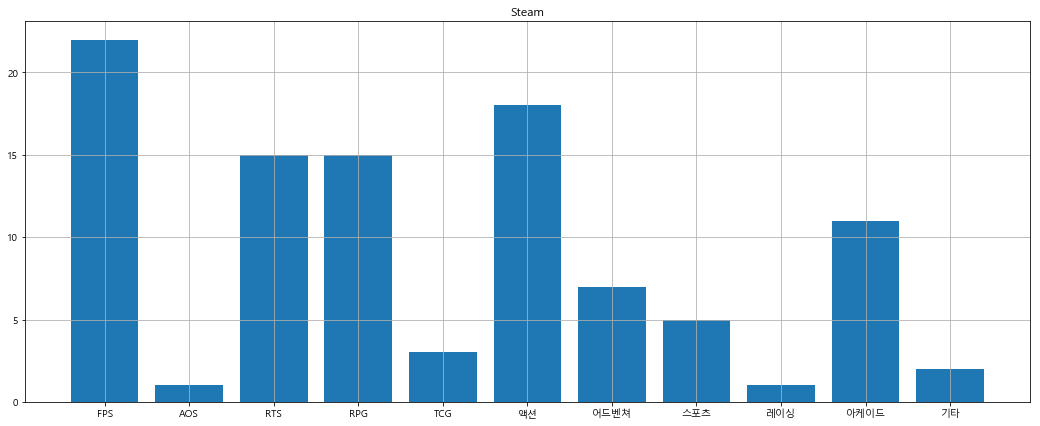

In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
fl = fm.FontProperties(fname='C:\Windows\Fonts\malgun.ttf').get_name()
plt.rc('font',family=fl)
x = steam_genre_graph
y = steam_graph
plt.title('Steam')
plt.rcParams["figure.figsize"] = (18, 7)
plt.bar(x,y,align='center')
plt.grid(True)
plt.show()

결론 : <br>
스팀에서는 FPS, 액션, (RTS,RPG), 아케이드, 어드벤쳐, 스포츠, (레이싱, AOS), 순으로 인기가 많다.<br>
그리고 스팀 게임순위 100위 중 한국 게임은 배틀그라운드가 유일했으며, 한국 게임이 유행했던 것도,<br>
배틀그라운드와 던그리드 두 개의 게임 정도가 인기가 많았다.<br>
결론적으로 스팀에서는 FPS게임과 오픈월드 액션게임이 상위권에 많이 분포되어있었으며,<br>
스토리가 탄탄한 어드벤쳐 게임과 RTS게임이 그 뒤를 잇는 경향을 볼 수 있었다.<br>
한국이 콘솔 게임 시장에서 경쟁력이 있으려면 스토리가 다른 게임보다 독특한 어드벤쳐 게임을 만들거나<br>
게임서잉 뛰어난 액션, FPS게임을 제작하여야 한다.<br>
처음에 FPS, AOS게임이 강세를 보일 것이라 예측했으나,<br>
FPS의 경우는 상위권이었지만 AOS게임은 거의 보이지 않았다.<br>
아무래도 스팀은 콘솔게임이 주를 이루다보니 AOS게임보다 FPS게임이 더 많이 존재하는 것 같다.

데이터 획득:<br>
게임메카 : 게임메카는 플레이 횟수 및 포털사이트 검색, 홈페이지 방문, 게임메카 유저들의 투표를 기준으로 순위를 메긴다.<br>
게임메카의 순위를 BeautifulSoup를 이용하여 크롤링하여 전체 코드를 받아내고,<br>
순위를 나열하도록 데이터를 가공한다.

데이터 가공 :<br>
게임메카 : 스팀과 마찬가지로 웹 크롤링을 통해 전체 정보를 받아오고,<br>
for 문과 tag.text()문법을 이용하여 필요한 정보만을 추출했다.<br>
그리고 이 정보를 list를 이용하여 그래프와 표로 표현하기 쉬운형태로 만들어,<br>
판다스를 이용해 위 정보를 표와 그래프로 표현했다.<br>

In [6]:
#Game meca ranking
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd
from matplotlib import pyplot
ranking = []
name = []
genre = []
span = []
genre_count = []
url='https://www.gamemeca.com/ranking.php?rid=1831'
page = urlopen(url)
soup = BeautifulSoup(page,"html.parser")
soup.prettify()
tags2 = soup.find_all('span','rank')
for tag in tags2:
    ranking.append(tag.text)
tags = soup.find_all('div',attrs={'class':'game-name'})
for tag in tags:
    name.append(tag.text)
tags3 = soup.find_all('span')
for tag in tags3:
    span.append(tag.text)
for i in range(26,370,7):
    genre.append(span[i])
genre[42] = 'ARPG' #웹 사이트에서 누락된 정보로 직접 입력을 하였다.
genre_count.append(genre.count('MMORPG'))
genre_count.append(genre.count('AOS'))
genre_count.append(genre.count('레이싱'))
genre_count.append(genre.count('FPS'))
genre_count.append(genre.count('스포츠'))
genre_count.append(genre.count('액션 RPG'))
genre_count.append(genre.count('전략시뮬'))
genre_count.append(genre.count('액션'))
genre_count.append(genre.count('RTS'))
genre_count.append(genre.count('TCG'))
genre_count.append(genre.count('육성시뮬'))
genre_count.append(genre.count('시뮬레이션'))
genre_count.append(genre.count('ARPG'))
genre_count.append(genre.count('MORPG'))
genre_count.append(genre.count('리듬액션'))
genre_count.append(genre.count('어드벤쳐'))
genre_dict={'MMORPG':16,'AOS':4,'레이싱':2,'FPS':8,'스포츠':2,'액션 RPG':4,'전략시뮬':2,'액션':3,'RTS':2
           ,'TCG':1,'육성시뮬':1,'시뮬레이션':1,'ARPG':1,'MORPG':1,'리듬액션':1,'어드벤쳐':1}
genre_graph = list(genre_dict)
meca_data = {'Ranking':ranking,'Name':name,'Genre':genre}
pd.DataFrame(meca_data)

,Ranking,Name,Genre
0,1,리그 오브 레전드,AOS
1,2,카트라이더,레이싱
2,3,오버워치,FPS
3,4,로스트아크,MMORPG
4,5,서든어택,FPS
5,6,메이플스토리,MMORPG
6,7,플레이어언노운스 배틀그라운드,FPS
7,8,피파 온라인 4,스포츠
8,9,던전앤파이터,액션 RPG
9,10,스타크래프트: 브루드 워,전략시뮬


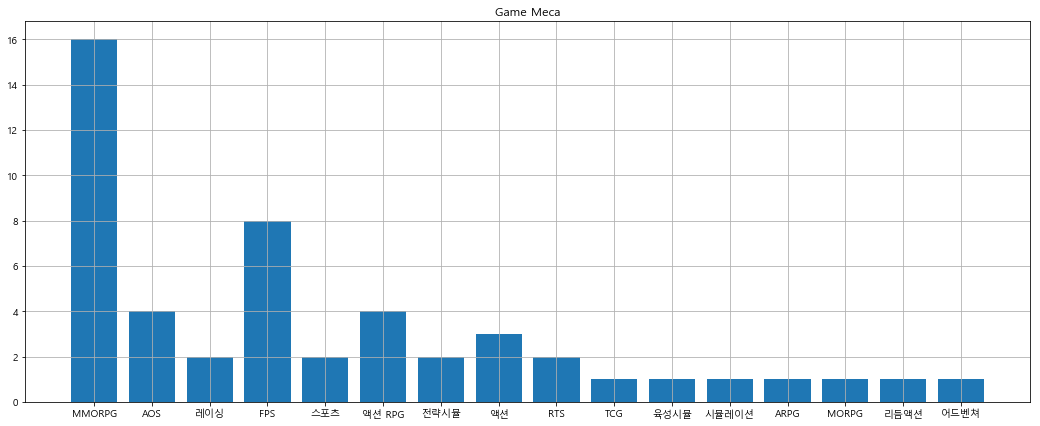

In [8]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
fl = fm.FontProperties(fname='C:\Windows\Fonts\malgun.ttf').get_name()
plt.rc('font',family=fl)
x = genre_graph
y = genre_count
plt.title('Game Meca')
plt.rcParams["figure.figsize"] = (18, 7)
plt.bar(x,y,align='center')
plt.grid(True)
plt.show()

결론 : <br>
게임메카에서는 RPG(MMORPG + 액션 RPG + ARPG + MORPG), FPS, (AOS,RTS), 액션, (레이싱, 스포츠),(육성, 시뮬레이션, 리듬, 어드벤쳐)<br>
순으로 인기가 많았다. 게임메카는 전세계 플레이어가 아닌 한국 플레이어들을 기준으로 계산한 순위이다.<br>
확실히 한국 내에서는 RPG게임과 FPS게임이 매우 인기가 많다는 것을 알 수 있었다.<br>
하지만 AOS게임의 수가 예상보다 적었는데, 그 이유는 리그 오브 레전드와 도타2가 워낙 유명한 AOS게임이라<br>
AOS게임들이 인기가 많을 것이라는 생각이 들었던 것이다.<br>
국내에서 인기가 많으려면 RPG게임을 만드는 것이 도움이 될 것 이라는 결론이 나왔다.<br>
또한 FPS 게임도 충분히 경쟁력이 있는 장르이다.<br>

데이터 획득:<br>
newzoo : newzoo는 전세계 게임의 순위를 플레이 횟수, 스트리밍 횟수로 나누어 순위를 알려준다.<br>
newzoo에서는 게임메카와 마찬가지로 BeatifulSoup로 크롤링하여 전체를 받아,<br>
플레이 횟수 : 게이머들이 직접 플레이하는 것을 선호하는 게임을 알 수 있다.<br>
이를 통하여 게이머들이 즐겨하는 게임의 유형을 알 수 있을 것이다.<br>
스트리밍 횟수 : 게이머들이 트위치와 유튜브를 통하여 게임방송을 시청하는데,<br>
아래 자료를 통해 게이머들이 시청하는데 즐거움을 느끼는 게임의 유형을 조사할 것이다.

데이터 가공:<br>
웹 크롤링을 통하여 모든 정보를 받아오고,<br>
for문과 tag.text()를 이용하여 필요한 정보를 추출하고<br>
dictionary로 장르와 게임이름이 대응하도록 정리하고, 이 안의 value 값만을 추출해낸다.<br>
그리고 이 정보들을 list형식으로 표현하여 표와 그래프로 정보를 시각화한다.

In [9]:
#newzoo
#플레이 횟수
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd
all_inform=[]
name = []
ranking = []
newzoo_genre = []
newzoo_genre_graph = []
url='https://newzoo.com/insights/rankings/top-20-core-pc-games/'
page = urlopen(url)
soup = BeautifulSoup(page,"html.parser")
soup.prettify()
tags=soup.find_all('td')
for tag in tags:
    all_inform.append(tag.text)
for i in range(2,100,5):
    name.append(all_inform[i])
for j in range(1,100,5):
    ranking.append(all_inform[j])
newzoo_genre_dict = {'League of lendends':'AOS','Hearthstone: Heroes of Warcraft':'TCG','Minecraft':'어드벤쳐',
                     'Counter-Strike: Global Offensive':'FPS','Fortnite':'FPS','Apex Legends':'FPS','Overwatch':'FPS',
                     "Tom Clancy's Rainbow Six: Siege":'FPS','Dota 2':'AOS',"PLAYERUNKNOWN'S BATTLEGROUNDS":'FPS',
                     'World of Warcraft':'RPG','Grand Theft Auto V':'액션','World Of Tanks':'액션',"Garry's Mod":'아케이드',
                     'Rocket League':'스포츠','Borderlands 2':'FPS','Arma 3':'FPS',"Assassin's Creed: Unity":'액션',
                     'Magic the Gathering: Arena':'TCG','Rust':'어드벤쳐'}
for value in newzoo_genre_dict.values():
    newzoo_genre.append(value)
newzoo_genre_graph.append(newzoo_genre.count('AOS'))
newzoo_genre_graph.append(newzoo_genre.count('FPS'))
newzoo_genre_graph.append(newzoo_genre.count('RPG'))
newzoo_genre_graph.append(newzoo_genre.count('TCG'))
newzoo_genre_graph.append(newzoo_genre.count('스포츠'))
newzoo_genre_graph.append(newzoo_genre.count('액션'))
newzoo_genre_graph.append(newzoo_genre.count('어드벤쳐'))
newzoo_genre_graph.append(newzoo_genre.count('아케이드'))
newzoo_data_dict = {'AOS':2,'FPS':8,'RPG':1,'TCG':2,'스포츠':1,'액션':3,'어드벤쳐':2,'아케이드':1}
newzoo_graph = list(newzoo_data_dict)
data_newzoo_play = {'Ranking':ranking,'Name':name,'Genre':newzoo_genre}
pd.DataFrame(data_newzoo_play)

,Ranking,Name,Genre
0,1,League of Legends,AOS
1,2,Hearthstone: Heroes of Warcraft,TCG
2,3,Minecraft,어드벤쳐
3,4,Counter-Strike: Global Offensive,FPS
4,5,Fortnite,FPS
5,6,Apex Legends,FPS
6,7,Overwatch,FPS
7,8,Tom Clancy's Rainbow Six: Siege,FPS
8,9,Dota 2,AOS
9,10,PLAYERUNKNOWN'S BATTLEGROUNDS,FPS


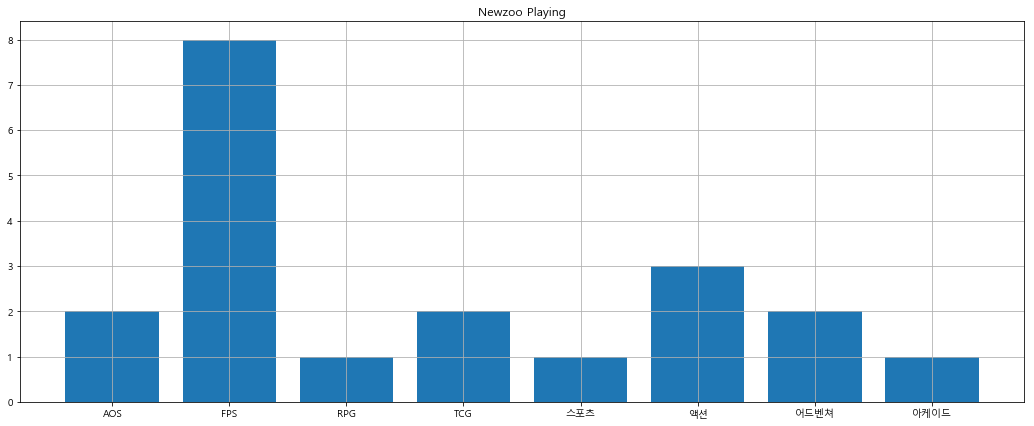

In [10]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
fl = fm.FontProperties(fname='C:\Windows\Fonts\malgun.ttf').get_name()
plt.rc('font',family=fl)
x = newzoo_graph
y = newzoo_genre_graph
plt.title('Newzoo Playing')
plt.rcParams["figure.figsize"] = (18, 7)
plt.bar(x,y,align='center')
plt.grid(True)
plt.show()

결론 : <br>
플레이 : newzoo에서 플레이 순위는 FPS, 액션 ,(AOS, TCG, 어드벤쳐), (RPG, TCG, 스포츠, 아케이드) 순으로 인기가 많았다.<br>
newzoo는 다른 플랫폼과 달리 플레이는 20개의 게임들의 순위를 보여주는데, 1위는 압도적인 게임인<br>
리그 오브 레전드로 AOS 게임이 차지하였지만, 다음 순위부터는 <br>
FPS가 다른 장르에 비해 압도적으로 인기가 많은 것을 확인할 수 있었다.<br>
전세계 게이머들을 대상으로한 이 조사는 압도적 1위인 AOS 리그 오브 레전드를 제외하면,<br>
FPS장르가 매우 인기가 많다는 것을 알려준다.<br>
따라서 한국은 전세계 게이머들을 대상으로 좋은 성적을 거두기 위해서는<br>
FPS장르의 게임을 만드는 것이 좋을 것이다.<br>
좋은 성적을 위해서는 카운터 스트라이크: 글로벌 오펜시브나 레인보우 식스 시즈 정도의 퀄리티가 필요하다.

In [12]:
#newzoo
#스트리밍 횟수
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd
all_inform2 = []
name_streaming = []
ranking_streaming = []
streaming_all_time = []
streaming_E_sports = []
streaming_genre = []
streaming_genre_figure = []
url='https://newzoo.com/insights/rankings/top-games-twitch-youtube/'
page = urlopen(url)
soup = BeautifulSoup(page,"html.parser")
soup.prettify()
tags=soup.find_all('td')
for tag in tags:
    all_inform2.append(tag.text)
for i in range(2,70,7):
    name_streaming.append(all_inform2[i])
for j in range(1,70,7):
    ranking_streaming.append(all_inform2[j])
for k in range(3,70,7):
    streaming_all_time.append(all_inform2[k])
for l in range(4,70,7):
    streaming_E_sports.append(all_inform2[l])
streaming_dict = {'League of legends':'AOS','Dota 2':'AOS','Counter-Strike: Global Offensive':'FPS','Overwatch':'FPS',
                  'Hearthstone':'TCG','Rocket League':'스포츠','StarCraft II':'RTS','Call of Duty: Black Ops 4':'FPS',
                  "Tom Clancy's Rainbow Six: Siege":'FPS','Super Smash Bros. Ultimate':'액션'}
for value in streaming_dict.values():
    streaming_genre.append(value)
streaming_genre_figure.append(streaming_genre.count('AOS'))
streaming_genre_figure.append(streaming_genre.count('FPS'))
streaming_genre_figure.append(streaming_genre.count('TCG'))
streaming_genre_figure.append(streaming_genre.count('RTS'))
streaming_genre_figure.append(streaming_genre.count('액션'))
streaming_genre_figure.append(streaming_genre.count('스포츠'))
streaming_graph_dict = {'AOS':2,'FPS':4,'TCG':1,'RTS':1,'액션':1,'스포츠':1}
streaming_graph_x = list(streaming_graph_dict)
data_newzoo_streaming = {'Ranking':ranking_streaming,'Name':name_streaming,'Streaming all time':streaming_all_time,
                         'Streaming E-sports':streaming_E_sports,'Genre':streaming_genre}
pd.DataFrame(data_newzoo_streaming)

,Ranking,Name,Streaming all time,Streaming E-sports,Genre
0,1,League of Legends,102.4M,22.1M,AOS
1,2,Dota 2,46.5M,19.3M,AOS
2,3,Counter-Strike: Global Offensive,29.5M,14.2M,FPS
3,4,Overwatch,24.2M,10.3M,FPS
4,5,Hearthstone,23.9M,3.6M,TCG
5,6,Rocket League,6.1M,2.9M,스포츠
6,7,StarCraft II,4.9M,2.3M,RTS
7,8,Call of Duty: Black Ops 4,8.1M,2.3M,FPS
8,9,Tom Clancy's Rainbow Six: Siege,9.2M,1.3M,FPS
9,10,Super Smash Bros. Ultimate,3.2M,1.3M,액션


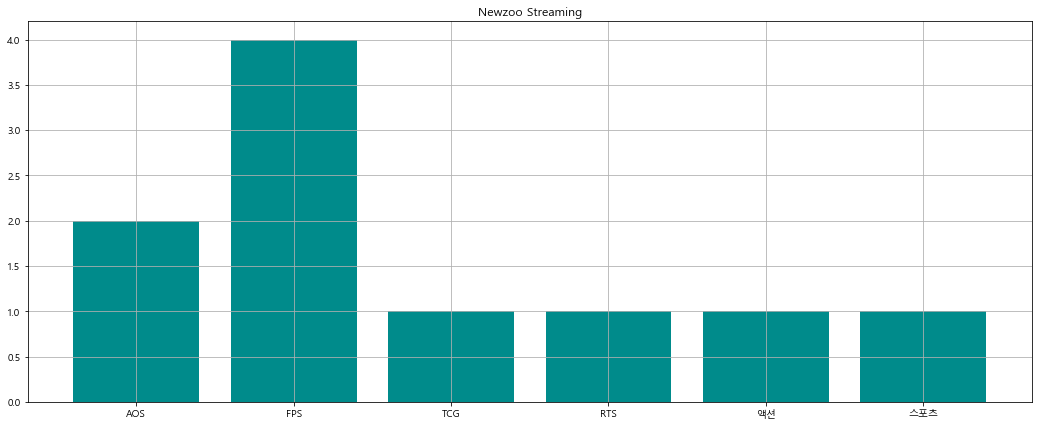

In [14]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
fl = fm.FontProperties(fname='C:\Windows\Fonts\malgun.ttf').get_name()
plt.rc('font',family=fl)
x = streaming_graph_x
y = streaming_genre_figure
plt.title('Newzoo Streaming')
plt.rcParams["figure.figsize"] = (18, 7)
plt.bar(x,y,align = 'center',color = 'darkcyan')
plt.grid(True)
plt.show()

결론 : <br>
스트리밍: newzoo 스트리밍에서는 FPS, AOS, (TCG, RTS, 액션, 스포츠) 순으로 인기가 많다.<br>
스트리밍에서도 다른 플랫폼과 마찬가지로 FPS가 강세를 띈다.<br>
하지만 1, 2위가 AOS장르가 차지하였으며, 이 이유는<br>
위 순위가 E-Sports를 기준으로 순위를 계산한 것이다보니,<br>
다른 게임에 비해 리그 오브 레전드와 도타2가 체계적으로 대회가 진행되고 있기 때문이다.<br>
결론은 스트리밍 시청도 FPS와 AOS가 인기가 많은 것을 알 수 있다.

데이터 획득:<br>
게임트릭스 : 게임트릭스에서는 pc방 점유율을 기준으로 순위를 메긴다.<br>
게임트릭스 자체에서 제공하는 엑셀 파일을 이용하여 게임순위를 조사할 것이다.<br>
자체 제공하는 엑셀 파일을 파이썬으로 불러와 데이터를 가공하고 시각적인 표현을 할 것이다.<br>

데이터 가공:<br>
엑셀 파일을 csv형태로 저장하여 python으로 불러와 pandas를 이용하여 표료 표현했다.<br>
그리고 csv파일 내에서 각 장르가 몇 개가 포함되어 있는지를 count를 이용하여 수를 센다음<br>
이를 리스트에 저장하여 그래프로 표현하였다.

In [15]:
#Game tricks
import csv
import pandas as pd
genre_count_tricks = []
data = pd.read_csv('Game trics ranking.csv',encoding='cp949')
genre_tricks = data.장르.tolist()
genre_count_tricks.append(genre_tricks.count('RPG'))
genre_count_tricks.append(genre_tricks.count('FPS'))
genre_count_tricks.append(genre_tricks.count('스포츠'))
genre_count_tricks.append(genre_tricks.count('레이싱'))
genre_count_tricks.append(genre_tricks.count('RTS'))
genre_count_tricks.append(genre_tricks.count('아케이드'))
genre_count_tricks.append(genre_tricks.count('포커'))
genre_count_tricks.append(genre_tricks.count('고스톱'))
genre_count_tricks.append(genre_tricks.count('보드'))
dict_tricks = {'RPG':21,'FPS':9,'스포츠':2,'레이싱':2,'RTS':6,'아케이드':3,'포커':4,'고스톱':2,'보드':1}
tricks_graph_x = list(dict_tricks)
pd.read_csv('Game trics ranking.csv',encoding='cp949')

,순위,게임명,장르
0,1,리그 오브 레전드,RTS
1,2,배틀그라운드,FPS
2,3,오버워치,FPS
3,4,피파온라인4,스포츠
4,5,카트라이더,레이싱
5,6,서든어택,FPS
6,7,스타크래프트,RTS
7,8,로스트아크,RPG
8,9,메이플 스토리,RPG
9,10,던전앤파이터,RPG


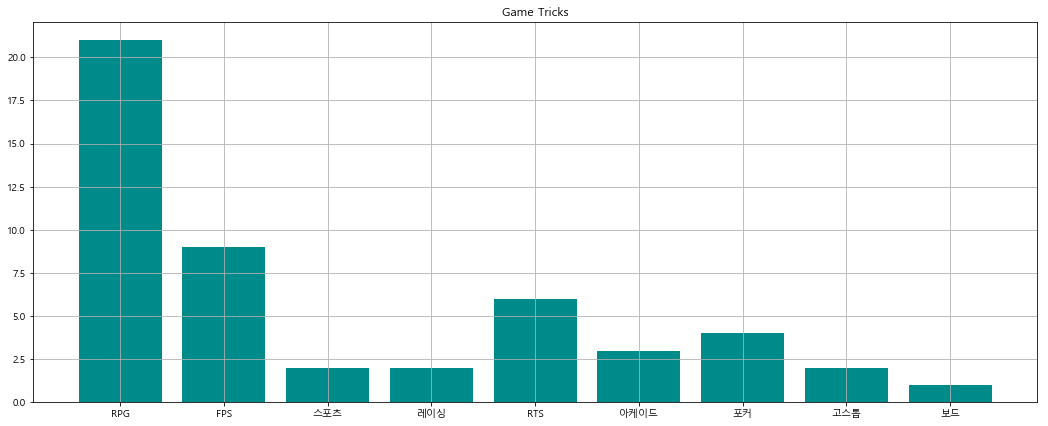

In [16]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
fl = fm.FontProperties(fname='C:\Windows\Fonts\malgun.ttf').get_name()
plt.rc('font',family=fl)
x = tricks_graph_x
y = genre_count_tricks
plt.title('Game Tricks')
plt.rcParams["figure.figsize"] = (18, 7)
plt.bar(x,y,align = 'center',color = 'darkcyan')
plt.grid(True)
plt.show()

결론 : <br>
게임트릭스: 게임트릭스에서는 RPG, FPS, 보드(포커 + 고스톱 +보드), RTS, 아케이드, (스포츠, 레이싱)<br>
순으로 인기가 많다. 게임트릭스는 한국의 PC방에서 플레이하는 시간으로 게임 순위를 계산한 것이므로,<br>
순전히 한국인 게이머가 선호하는 게임의 유형을 알 수 있다.<br>
따라서 위 자료를 봤을 때, 한국 게이머들은 RPG게임을 다른 게임들보다 더 많이 플레이하는 것을 알 수 있었다.<br>
따라서 한국 게임 시장에서 성공을 하려면 RPG게임을 만드는 것이 다른 게임에 비해 성공할 확률이 높다.<br>
이러한 이유로 RPG게임이 많이 제작되고 있는 것이 현실이기도 하다.

최종 결론: 전세계 게임 시장에서는 오픈월드 액션, FPS게임이 경쟁력이 있고<br>
한국 게임 시장에서는 RPG가 경쟁력이 있는 장르이다.<br>
압도적인 1위인 AOS 게임 리그 오브 레전드의 경우는 게임성이 높기 때문에 인기가 많은 것이며,<br>
대부분의 순위를 봤을 때 한국에서 만든 AOS는 높은 순위에 위치한 적이 없음을 알 수 있다.<br>
따라서 1위라는 사실만을 보고 AOS장르의 게임을 만드는 것은 다른 장르의 게임을 제작하는 것 보다 경쟁력이 떨어진다.<br>
하지만 무엇보다 우선시되는 것은 게임성과 최적화 그리고 재미가 중요하다.<br>
단기적으로 높은 순위에 있는 게임보다 장기적으로 높은 순위에 있기 위해서는 게임성과 재미가 중요하며<br>
게임을 잘 운영하고, 피드백을 잘 받아들이는 것이 중요하다.

또한 한국의 게임시장의 발전을 위해서는 한국내에서 성공을 위해 MMORPG류의 게임을 만드는 것이 아닌,<br>
FPS나 오픈월드 액션 게임 등 콘솔 게임 제작의 세계에 발을 들여야한다.<br>
MMORPG는 더 이상 게임의 트랜드가 아니기 때문이다.

위에서 조사한 자료를 토대로, 각 순위내에 있는 게임들의 정보를 알 수 있는 프로그램을 만들었다.<br>
검색 플랫폼을 스팀과 네이버로 구분하여 스팀게임의 순위는 스팀에서<br>
나머지 사이트의 순위는 네이버에서 검색할 수 있도록 하였다.<br>
*압축파일의 code라는 폴더를 c드라이브에 생성하여 Chrome driver가 작동할 수 있도록 해야한다.<br>
code폴더를 c드라이브에 옮겨넣는다.

각각의 장르에 해당하는 게임들을 하나의 리스트에 모아 프로그램을 실행시키면<br>
한 눈에 보기 편하도록 만들었으며, 원하는 정보를 쉽게 얻을 수 있도록 이 프로그램을 만들었다.<br>
굉장히 간단한 if문을 이용하여 만들었으며, 스팀과 네이버에 직접 검색하지 않아도 자동으로 검색되도록 설계하였다.

In [17]:
from selenium import webdriver
AOS = ['리그 오브 레전드','도타2','히어로즈 오브 더 스톰']
FPS = ['오버워치','서든어택','배틀그라운드','에이팩스 레전드','레인보우 식스:시즈','스페셜포스','데스티니 가디언즈','카운터 스트라이크 온라인','카운터 스트라이크 글로벌 오펜시브','포트나이트','보더랜드 2','아르마 3','콜 오브 듀티 블랙 옵스 4','버블파이터']
RPG = ['로스트아크','메이플스토리','리니지','던전앤파이터','디아블로 3','월드 오브 워크래프트','천하제일상 거상','블레이드앤소울','아이온: 영원의 탑','검은사막','리니지 2','파이널 판타지 14','아키에이지','디아블로 2','엘소드','테라','마비노기','천애명월도','패스 오브 엑자일','뮤 온라인','마비노기 영웅전','R2','몬스터헌터:월드']
RTS = ['스타크래프트','워크래프트3','스타크래프트2','토탈 워:삼국']
TCG = ['하스스톤','매직 더 개더링 아레나']
Sports = ['피파 온라인 4','마구마구','로켓 리그']
Racing = ['카트라이더','테일즈런너']
Action = ['사이퍼즈','GTA 5','클럽 오디션','월드 오브 탱크','어쌔신 크리드:유니티','러스트','슈퍼 스매시브라더스 얼티밋']
Arcade = ['심즈 4','스타듀밸리','마인크래프트','게리 모드','크레이지 아케이드 비앤비']
Board = ['한게임 로우바둑이','한게임 하이로우','한게임 신맞고','피망 고스톱','한게임 라스베가스 포커','한게임 세븐포커']
AOS_steam =['Dota 2']
FPS_steam = ["PLAYERUNKNOWN'S BATTLEGROUNDS",'Counter-Strike: Global Offensive',"Tom Clancy's Rainbow Six Siege",'Warframe','Team Fortress 2','Source SDK Base 2013 Multiplayer','Ring of Elysium','Unturned','MORDHAU','Arma 3','Left 4 Dead 2','Counter-Strike','Borderlands 2','DayZ','Watch_Dogs 2','Killing Floor 2','Company of Heroes 2','Risk of Rain 2','Counter-Strike: Source','Enter the Gungeon','SCP: Secret Laboratory','Heroes & Generals']
RPG_steam = ['MONSTER HUNTER: WORLD','Terraria','The Elder Scrolls Online','The Elder Scrolls 5: Skyrim Special Edition','FINAL FANTASY 14 Online','The Elder Scrolls 5: Skyrim','Mount & Blade: Warband','Path of Exile','DARK SOULS 3','Divinity: Original Sin 2','Albion Online',"Conqueror's Blade",'Black Desert Online','ATLAS','Trove']
RTS_steam = ['XCOM 2','Total War: THREE KINGDOMS',"Sid Meier's Civilization 6","Sid Meier's Civilization 5",'Stellaris','Hearts of Iron 4','Total War: WARHAMMER 2','Paladins','Europa Universalis 4','RimWorld',"Age of Empires 2: HD Edition",'Factorio','World of Warships','Crusader Kings 2','Total War: ROME 2 - Emperor Edition']
TCG_steam = ['Shadowverse','Slay the Spire','Yu-Gi-Oh! Duel Links']
Sports_steam = ['Football Manager 2019','Rocket League','NBA 2K19','Football Manager 2018','Football Manager 2017']
Racing_steam = ['Crossout']
Action_steam = ['Grand Theft Auto 5','Dead by Daylight','World of Tanks Blitz','War Thunder',"Assassin's Creed Odyssey",'The Witcher 3: Wild Hunt','Fallout 4','PAYDAY 2','7 Days to Die','SMITE','Brawlhalla','Idle Champions of the Forgotten Realms','The Binding of Isaac: Rebirth','Sekiro: Shadows Die Twice','Deathgarden: BLOODHARVEST','For Honor','TEKKEN 7']
Arcade_steam = ["Garry's Mod",'Euro Truck Simulator 2','Cities: Skylines','Stardew Valley','Farming Simulator 19','Human: Fall Flat','Kerbal Space Program','DEAD OR ALIVE Xtreme Venus Vacation','Oxygen Not Included','Space Engineers','The Sims 3']
Adventure_steam = ['ARK: Survival Evolved','Rust',"Don't Starve Together",'Conan Exiles','Grim Dawn','The Forest','Raft']
recommend_genre_steam = ['FPS','AOS','RPG','TCG','RTS','레이싱','스포츠','액션','아케이드','어드벤쳐']
recommend_genre = ['FPS','AOS','RPG','TCG','RTS','레이싱','스포츠','액션','아케이드','보드']

userInput_plat = input('이용할 플랫폼을 입력해주세요(naver, steam): ')
if userInput_plat == 'naver':
    userInput_genre = input('원하는 장르를 선택해 주세요(FPS,AOS,RPG,TCG,RTS,레이싱,스포츠,액션,아케이드,보드):')
    if userInput_genre == 'AOS':
        print(AOS)
        while True:
            userInput_game_naver = input('게임이름을 입력해주세요(리스트 내의 이름과 같게 입력해주세요): ')
            if userInput_game_naver not in AOS:
                print('게임이 목록에 없습니다.')
            elif userInput_game_naver in AOS:
                driver = webdriver.Chrome('C:\code\chromedriver.exe')
                driver.get('http://www.naver.com')
                driver.find_element_by_xpath('//*[@id="query"]').send_keys(userInput_game_naver)
                driver.find_element_by_xpath('//*[@id="search_btn"]').click()
                break
    elif userInput_genre == '스포츠':
        print(Sports)
        while True:
            userInput_game_naver = input('게임이름을 입력해주세요(리스트 내의 이름과 같게 입력해주세요): ')
            if userInput_game_naver not in Sports:
                print('게임이 목록에 없습니다.')
            elif userInput_game_naver in Sports:
                driver = webdriver.Chrome('C:\code\chromedriver.exe')
                driver.get('http://www.naver.com')
                driver.find_element_by_xpath('//*[@id="query"]').send_keys(userInput_game_naver)
                driver.find_element_by_xpath('//*[@id="search_btn"]').click()
                break
    elif userInput_genre == 'RTS':
        print(RTS)
        while True:
            userInput_game_naver = input('게임이름을 입력해주세요(리스트 내의 이름과 같게 입력해주세요): ')
            if userInput_game_naver not in RTS:
                print('게임이 목록에 없습니다.')
            elif userInput_game_naver in RTS:
                driver = webdriver.Chrome('C:\code\chromedriver.exe')
                driver.get('http://www.naver.com')
                driver.find_element_by_xpath('//*[@id="query"]').send_keys(userInput_game_naver)
                driver.find_element_by_xpath('//*[@id="search_btn"]').click()
                break
    elif userInput_genre == 'FPS':
        print(FPS)
        while True:
            userInput_game_naver = input('게임이름을 입력해주세요(리스트 내의 이름과 같게 입력해주세요): ')
            if userInput_game_naver not in FPS:
                print('게임이 목록에 없습니다.')
            elif userInput_game_naver in FPS:
                driver = webdriver.Chrome('C:\code\chromedriver.exe')
                driver.get('http://www.naver.com')
                driver.find_element_by_xpath('//*[@id="query"]').send_keys(userInput_game_naver)
                driver.find_element_by_xpath('//*[@id="search_btn"]').click()
                break
    elif userInput_genre == 'TCG':
        print(TCG)
        while True:
            userInput_game_naver = input('게임이름을 입력해주세요(리스트 내의 이름과 같게 입력해주세요): ')
            if userInput_game_naver not in TCG:
                print('게임이 목록에 없습니다.')
            elif userInput_game_naver in TCG:
                driver = webdriver.Chrome('C:\code\chromedriver.exe')
                driver.get('http://www.naver.com')
                driver.find_element_by_xpath('//*[@id="query"]').send_keys(userInput_game_naver)
                driver.find_element_by_xpath('//*[@id="search_btn"]').click()
                break
    elif userInput_genre == 'RPG':
        print(RPG)
        while True:
            userInput_game_naver = input('게임이름을 입력해주세요(리스트 내의 이름과 같게 입력해주세요): ')
            if userInput_game_naver not in RPG:
                print('게임이 목록에 없습니다.')
            elif userInput_game_naver in RPG:
                driver = webdriver.Chrome('C:\code\chromedriver.exe')
                driver.get('http://www.naver.com')
                driver.find_element_by_xpath('//*[@id="query"]').send_keys(userInput_game_naver)
                driver.find_element_by_xpath('//*[@id="search_btn"]').click()
                break
    elif userInput_genre == '레이싱':
        print(Racing)
        while True:
            userInput_game_naver = input('게임이름을 입력해주세요(리스트 내의 이름과 같게 입력해주세요): ')
            if userInput_game_naver not in Racing:
                print('게임이 목록에 없습니다.')
            elif userInput_game_naver in Racing:
                driver = webdriver.Chrome('C:\code\chromedriver.exe')
                driver.get('http://www.naver.com')
                driver.find_element_by_xpath('//*[@id="query"]').send_keys(userInput_game_naver)
                driver.find_element_by_xpath('//*[@id="search_btn"]').click()
                break
    elif userInput_genre == '아케이드':
        print(Arcade)
        while True:
            userInput_game_naver = input('게임이름을 입력해주세요(리스트 내의 이름과 같게 입력해주세요): ')
            if userInput_game_naver not in Arcade:
                print('게임이 목록에 없습니다.')
            elif userInput_game_naver in Arcade:
                driver = webdriver.Chrome('C:\code\chromedriver.exe')
                driver.get('http://www.naver.com')
                driver.find_element_by_xpath('//*[@id="query"]').send_keys(userInput_game_naver)
                driver.find_element_by_xpath('//*[@id="search_btn"]').click()
                break
    elif userInput_genre == '액션':
        print(Action)
        while True:
            userInput_game_naver = input('게임이름을 입력해주세요(리스트 내의 이름과 같게 입력해주세요): ')
            if userInput_game_naver not in Action:
                print('게임이 목록에 없습니다.')
            elif userInput_game_naver in Action:
                driver = webdriver.Chrome('C:\code\chromedriver.exe')
                driver.get('http://www.naver.com')
                driver.find_element_by_xpath('//*[@id="query"]').send_keys(userInput_game_naver)
                driver.find_element_by_xpath('//*[@id="search_btn"]').click()
                break
    elif userInput_genre == '보드':
        print(Board)
        while True:
            userInput_game_naver = input('게임이름을 입력해주세요(리스트 내의 이름과 같게 입력해주세요): ')
            if userInput_game_naver not in Board:
                print('게임이 목록에 없습니다.')
            elif userInput_game_naver in Board:
                driver = webdriver.Chrome('C:\code\chromedriver.exe')
                driver.get('http://www.naver.com')
                driver.find_element_by_xpath('//*[@id="query"]').send_keys(userInput_game_naver)
                driver.find_element_by_xpath('//*[@id="search_btn"]').click()
                break
elif userInput_plat == 'steam':
    while True:
        userInput_genre = input('원하는 장르를 선택해 주세요(FPS,AOS,RPG,TCG,RTS,스포츠,레이싱,아케이드,어드벤쳐):')
        if userInput_genre == 'AOS':
            print(AOS_steam)
            while 1:
                userInput_game_steam = input('게임이름을 입력해주세요(리스트 내의 이름과 같게 입력해주세요): ')
                if userInput_game_steam not in AOS_steam:
                    print('게임이 목록에 없습니다.')
                elif userInput_game_steam == 'Dota 2':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/570/Dota_2/')
                    break
            break
        elif userInput_genre == 'FPS':
            print(FPS_steam)
            while 1:
                userInput_game_steam = input('게임이름을 입력해주세요(리스트 내의 이름과 같게 입력해주세요): ')
                if userInput_game_steam not in FPS_steam:
                    print('게임이 목록에 없습니다.')
                elif userInput_game_steam == "PLAYERUNKNOWN'S BATTLEGROUNDS":
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/578080/PLAYERUNKNOWNS_BATTLEGROUNDS/')
                    break
                elif userInput_game_steam == "Counter-Strike: Global Offensive":
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/730/CounterStrike_Global_Offensive/')
                    break
                elif userInput_game_steam == "Tom Clancy's Rainbow Six Siege":
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/359550/Tom_Clancys_Rainbow_Six_Siege/')
                    break
                elif userInput_game_steam == "Warframe":
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/230410/Warframe/')
                    break
                elif userInput_game_steam == 'Team Fortress 2':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/440/Team_Fortress_2/')
                    break
                elif userInput_game_steam == 'Source SDK Base 2013 Multiplayer':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://steamcommunity.com/app/320')
                    break
                elif userInput_game_steam == 'Ring of Elysium':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/755790/Ring_of_Elysium/')
                    break
                elif userInput_game_steam == 'Unturned':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/304930/Unturned/')
                    break
                elif userInput_game_steam == 'MORDHAU':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/629760/MORDHAU/')
                    break
                elif userInput_game_steam == 'Arma 3':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/107410/Arma_3/')
                    break
                elif userInput_game_steam == 'Left 4 Dead 2':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/550/Left_4_Dead_2/')
                    break
                elif userInput_game_steam == 'Counter-Strike':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/10/CounterStrike/')
                    break
                elif userInput_game_steam == 'Borderlands 2':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/49520/Borderlands_2/')
                    break
                elif userInput_game_steam == 'DayZ':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/221100/DayZ/')
                    break
                elif userInput_game_steam == 'Watch_Dogs 2':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/447040/Watch_Dogs_2/')
                    break
                elif userInput_game_steam == 'Killing Floor 2':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/232090/Killing_Floor_2/')
                    break
                elif userInput_game_steam == 'Company of Heroes 2':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/230410/Warframe/')
                    break
                elif userInput_game_steam == 'Risk of Rain 2':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/632360/Risk_of_Rain_2/')
                    break
                elif userInput_game_steam == 'Counter-Strike: Source':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/240/CounterStrike_Source/')
                    break
                elif userInput_game_steam == 'Enter the Gungeon':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/311690/Enter_the_Gungeon/')
                    break
                elif userInput_game_steam == 'SCP: Secret Laboratory':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/700330/SCP_Secret_Laboratory/')
                    break
                elif userInput_game_steam == 'Heroes & Generals':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/227940/Heroes__Generals/')
                    break
            break
        elif userInput_genre == 'RPG':
            print(RPG_steam)
            while 1:
                userInput_game_steam = input('게임이름을 입력해주세요(리스트 내의 이름과 같게 입력해주세요): ')
                if userInput_game_steam not in RPG_steam:
                    print('게임이 목록에 없습니다.')
                elif userInput_game_steam == "MONSTER HUNTER: WORLD":
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/582010/MONSTER_HUNTER_WORLD/')
                    break
                elif userInput_game_steam == 'Terraria':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/105600/Terraria/')
                    break
                elif userInput_game_steam == 'The Elder Scrolls Online':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/306130/The_Elder_Scrolls_Online/')
                    break
                elif userInput_game_steam == 'The Elder Scrolls 5: Skyrim Special Edition':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/489830/The_Elder_Scrolls_V_Skyrim_Special_Edition/')
                    break
                elif userInput_game_steam == 'FINAL FANTASY 14 Online':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/312060/FINAL_FANTASY_XIV_Online_Free_Trial/')
                    break
                elif userInput_game_steam == 'The Elder Scrolls 5: Skyrim':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/72850/The_Elder_Scrolls_V_Skyrim/')
                    break
                elif userInput_game_steam == 'Mount & Blade: Warband':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/48700/Mount__Blade_Warband/')
                    break
                elif userInput_game_steam == 'Path of Exile':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://steamcommunity.com/app/238960')
                    break
                elif userInput_game_steam == 'DARK SOULS 3':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/374320/DARK_SOULS_III/')
                    break
                elif userInput_game_steam == 'Divinity: Original Sin 2':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/435150/Divinity_Original_Sin_2__Definitive_Edition/')
                    break
                elif userInput_game_steam == 'Albion Online':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/761890/Albion_Online/')
                    break
                elif userInput_game_steam == "Conqueror's Blade":
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://steamcommunity.com/app/905370')
                    break
                elif userInput_game_steam == 'Black Desert Online':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://steamcommunity.com/app/582660')
                    break
                elif userInput_game_steam == 'ATLAS':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/834910/ATLAS/')
                    break
                elif userInput_game_steam == 'Trove':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/304050/Trove/')
                    break
            break
        elif userInput_genre == 'RTS':
            print(RTS_steam)
            while 1:
                userInput_game_steam = input('게임이름을 입력해주세요(리스트 내의 이름과 같게 입력해주세요): ')
                if userInput_game_steam not in RTS_steam:
                    print('게임이 목록에 없습니다.')
                elif userInput_game_steam == 'XCOM 2':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/268500/XCOM_2/')
                    break
                elif userInput_game_steam == 'Total War: THREE KINGDOMS':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/779340/Total_War_THREE_KINGDOMS/')
                    break
                elif userInput_game_steam == "Sid Meier's Civilization 6":
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/289070/Sid_Meiers_Civilization_VI/')
                    break
                elif userInput_game_steam == "Sid Meier's Civilization 5":
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/8930/Sid_Meiers_Civilization_V/')
                    break
                elif userInput_game_steam == 'Stellaris':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/281990/Stellaris/')
                    break
                elif userInput_game_steam == 'Hearts of Iron 4':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/394360/Hearts_of_Iron_IV/')
                    break
                elif userInput_game_steam == 'Total War: WARHAMMER 2':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/594570/Total_War_WARHAMMER_II/')
                    break
                elif userInput_game_steam == 'Paladins':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/444090/Paladins/')
                    break
                elif userInput_game_steam == 'Europa Universalis 4':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/236850/Europa_Universalis_IV/')
                    break
                elif userInput_game_steam == 'RimWorld':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/294100/RimWorld/')
                    break
                elif userInput_game_steam == 'Age of Empires 2: HD Edition':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://steamcommunity.com/app/221380')
                    break
                elif userInput_game_steam == 'Factorio':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/427520/Factorio/')
                    break
                elif userInput_game_steam == 'World of Warships':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/552990/World_of_Warships/')
                    break
                elif userInput_game_steam == 'Crusader Kings 2':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/203770/Crusader_Kings_II/')
                    break
                elif userInput_game_steam == 'Total War: ROME 2 - Emperor Edition':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/214950/Total_War_ROME_II__Emperor_Edition/')
                    break
            break
        elif userInput_genre == 'TCG':
            print(TCG_steam)
            while 1:
                userInput_game_steam = input('게임이름을 입력해주세요(리스트 내의 이름과 같게 입력해주세요): ')
                if userInput_game_steam not in TCG_steam:
                    print('게임이 목록에 없습니다.')
                elif userInput_game_steam == 'Shadowverse':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/453480/Shadowverse_CCG/')
                    break
                elif userInput_game_steam == 'Slay the Spire':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/646570/Slay_the_Spire/')
                    break
                elif userInput_game_steam == 'Yu-Gi-Oh! Duel Links':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/601510/YuGiOh_Duel_Links/')
                    break
            break
        elif userInput_genre == '액션':
            print(Action_steam)
            while 1:
                userInput_game_steam = input('게임이름을 입력해주세요(리스트 내의 이름과 같게 입력해주세요): ')
                if userInput_game_steam not in Action_steam:
                    print('게임이 목록에 없습니다.')
                elif userInput_game_steam == 'Grand Theft Auto 5':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/271590/Grand_Theft_Auto_V/')
                    break
                elif userInput_game_steam == 'Dead by Daylight':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/381210/Dead_by_Daylight/')
                    break
                elif userInput_game_steam == 'World of Tanks Blitz':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/444200/World_of_Tanks_Blitz_MMO/')
                    break
                elif userInput_game_steam == 'War Thunder':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/236390/War_Thunder/')
                    break
                elif userInput_game_steam == "Assassin's Creed Odyssey":
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/812140/Assassins_Creed_Odyssey/')
                    break
                elif userInput_game_steam == 'The Witcher 3: Wild Hunt':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/292030/The_Witcher_3_Wild_Hunt/')
                    break
                elif userInput_game_steam == 'Fallout 4':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/377160/Fallout_4/')
                    break
                elif userInput_game_steam == 'PAYDAY 2':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/218620/PAYDAY_2/')
                    break
                elif userInput_game_steam == '7 Days to Die':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/251570/7_Days_to_Die/')
                    break
                elif userInput_game_steam == 'SMITE':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/386360/SMITE/')
                    break
                elif userInput_game_steam == 'Brawlhalla':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/291550/Brawlhalla/')
                    break
                elif userInput_game_steam == 'Idle Champions of the Forgotten Realms':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/627690/Idle_Champions_of_the_Forgotten_Realms/')
                    break
                elif userInput_game_steam == 'The Binding of Isaac: Rebirth':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/250900/The_Binding_of_Isaac_Rebirth/')
                    break
                elif userInput_game_steam == 'Sekiro: Shadows Die Twice':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/814380/Sekiro_Shadows_Die_Twice/')
                    break
                elif userInput_game_steam == 'Deathgarden: BLOODHARVEST':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/555440/Deathgarden_BLOODHARVEST/')
                    break
                elif userInput_game_steam == 'For Honor':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/304390/FOR_HONOR/')
                    break
                elif userInput_game_steam == 'TEKKEN 7':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/389730/TEKKEN_7/')
                    break
            break
        elif userInput_genre == '아케이드':
            print(Arcade_steam)
            while 1:
                userInput_game_steam = input('게임이름을 입력해주세요(리스트 내의 이름과 같게 입력해주세요): ')
                if userInput_game_steam not in Arcade_steam:
                    print('게임이 목록에 없습니다.')
                elif userInput_game_steam == "Garry's Mod":
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/4000/Garrys_Mod/')
                    break
                elif userInput_game_steam == 'Euro Truck Simulator 2':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/227300/Euro_Truck_Simulator_2/')
                    break
                elif userInput_game_steam == 'Cities: Skylines':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/255710/Cities_Skylines/')
                    break
                elif userInput_game_steam == 'Stardew Valley':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/413150/Stardew_Valley/')
                    break
                elif userInput_game_steam == 'Farming Simulator 19':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/787860/Farming_Simulator_19/')
                    break
                elif userInput_game_steam == 'Human: Fall Flat':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/477160/Human_Fall_Flat/')
                    break
                elif userInput_game_steam == 'Kerbal Space Program':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/220200/Kerbal_Space_Program/')
                    break
                elif userInput_game_steam == 'DEAD OR ALIVE Xtreme Venus Vacation':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/958260/DEAD_OR_ALIVE_Xtreme_Venus_Vacation/')
                    break
                elif userInput_game_steam == 'Oxygen Not Included':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/457140/Oxygen_Not_Included/')
                    break
                elif userInput_game_steam == 'Space Engineers':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/244850/Space_Engineers/')
                    break
                elif userInput_game_steam == 'The Sims 3':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/47890/The_Sims_3/')
                    break
            break
        elif userInput_genre == '스포츠':
            print(Sports_steam)
            while 1:
                userInput_game_steam = input('게임이름을 입력해주세요(리스트 내의 이름과 같게 입력해주세요): ')
                if userInput_game_steam not in Sports_steam:
                    print('게임이 목록에 없습니다.')
                elif userInput_game_steam == 'Football Manager 2019':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/872790/Football_Manager_2019/')
                    break
                elif userInput_game_steam == 'Rocket League':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/252950/Rocket_League/')
                    break
                elif userInput_game_steam == 'NBA 2K19':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/841370/NBA_2K19/')
                    break
                elif userInput_game_steam == 'Football Manager 2018':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/624090/Football_Manager_2018/')
                    break
                elif userInput_game_steam == 'Football Manager 2017':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://steamcommunity.com/app/482730')
                    break
            break
        elif userInput_genre == '어드벤쳐':
            print(Adventure_steam)
            while 1:
                userInput_game_steam = input('게임이름을 입력해주세요(리스트 내의 이름과 같게 입력해주세요): ')
                if userInput_game_steam not in Adventure_steam:
                    print('게임이 목록에 없습니다.')
                elif userInput_game_steam == 'ARK: Survival Evolved':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/346110/ARK_Survival_Evolved/')
                    break
                elif userInput_game_steam == 'Rust':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/252490/Rust/')
                    break
                elif userInput_game_steam == "Don't Starve Together":
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/322330/Dont_Starve_Together/')
                    break
                elif userInput_game_steam == 'Conan Exiles':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/440900/Conan_Exiles/')
                    break
                elif userInput_game_steam == 'Grim Dawn':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/219990/Grim_Dawn/')
                    break
                elif userInput_game_steam == 'The Forest':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/242760/The_Forest/')
                    break
                elif userInput_game_steam == 'Raft':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://store.steampowered.com/app/648800/Raft/')
                    break
            break
        elif userInput_genre == '레이싱':
            print(Racing_steam)
            while 1:
                userInput_game_steam = input('게임이름을 입력해주세요(리스트 내의 이름과 같게 입력해주세요): ')
                if userInput_game_steam not in Racing_steam:
                    print('게임이 목록에 없습니다.')
                elif userInput_game_steam == 'Crossout':
                    driver = webdriver.Chrome('C:\code\chromedriver.exe')
                    driver.get('https://steamcommunity.com/app/386180')
                    break
            break
        elif userInput_genre not in recommend_genre_steam:
            print('장르를 다시 선택해 주세요.')
else:
    print('프로그램을 중지 합니다.')

이용할 플랫폼을 입력해주세요(naver, steam): naver
원하는 장르를 선택해 주세요(FPS,AOS,RPG,TCG,RTS,레이싱,스포츠,액션,아케이드,보드):RPG
['로스트아크', '메이플스토리', '리니지', '던전앤파이터', '디아블로 3', '월드 오브 워크래프트', '천하제일상 거상', '블레이드앤소울', '아이온: 영원의 탑', '검은사막', '리니지 2', '파이널 판타지 14', '아키에이지', '디아블로 2', '엘소드', '테라', '마비노기', '천애명월도', '패스 오브 엑자일', '뮤 온라인', '마비노기 영웅전', 'R2', '몬스터헌터:월드']
게임이름을 입력해주세요(리스트 내의 이름과 같게 입력해주세요): 로스트아크


참고 문헌:<br>
스팀 게임순위 : https://store.steampowered.com/stats/<br>
게임메카순위: https://www.gamemeca.com/ranking.php<br>
Newzoo 게임순위(플레이): https://newzoo.com/insights/rankings/top-20-core-pc-games/<br>
Newzoo 게임순위(스트리밍): https://newzoo.com/insights/rankings/top-games-twitch-youtube/<br>
게임트릭스: http://www.gametrics.com/rank/Rank02.aspx<br>
웹 크롤링: https://blog.naver.com/luckperson7/221200031639<br>
https://beomi.github.io/2017/01/20/HowToMakeWebCrawler/<br>
http://zeroplus1.zc.bz/jh/web/main.php?id=132&category=ETC<br>
Pandas 패키지: https://www.opentutorials.org/module/3873/23171<br>
Matplotlib 패키지: https://blog.naver.com/dongyeon94/221473877075<br>
Selenium 패키지: https://blog.naver.com/dongyeon94/221512301723

별첨 3:<br>
-dictionary의 형태를 만들고 장르를 추출하기 위해 for문을 이용해 value 값만을 추출하기 위한 소스코드 이다.<br>
dict = {}<br>
list = []<br>
for value in dict.values():<br>
list.append(value)<br>

-크롤링 후 원하는 정보만을 추출하기 위한 소스코드 이다.
game_name = []
tags = soup.find_all('a','gameLink')<br>
for tag in tags:<br>
    game_name.append(tag.text)<br>
tag.text -> tag사이에 있는 정보만을 추출해주는 method